# Initial EDA

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler, label_binarize, LabelEncoder

In [35]:
df = pd.read_csv("/Users/sa10/Downloads/house-prices-advanced-regression-techniques/House-Prices-Portfolio-Project/data/train.csv")

In [36]:
# identify categorical columns (object dtype)
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical variables:")
print(categorical_cols)

# identify integer columns (int dtype)
integer_cols = df.select_dtypes(include='int').columns.tolist()
print("Integer variables:")
print(integer_cols)

# identify float columns (float dtype)
float_cols = df.select_dtypes(include='float').columns.tolist()
print("Float variables:")
print(float_cols)

Categorical variables:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
Integer variables:
['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'En

In [37]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [38]:
df.shape

(1460, 81)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [40]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


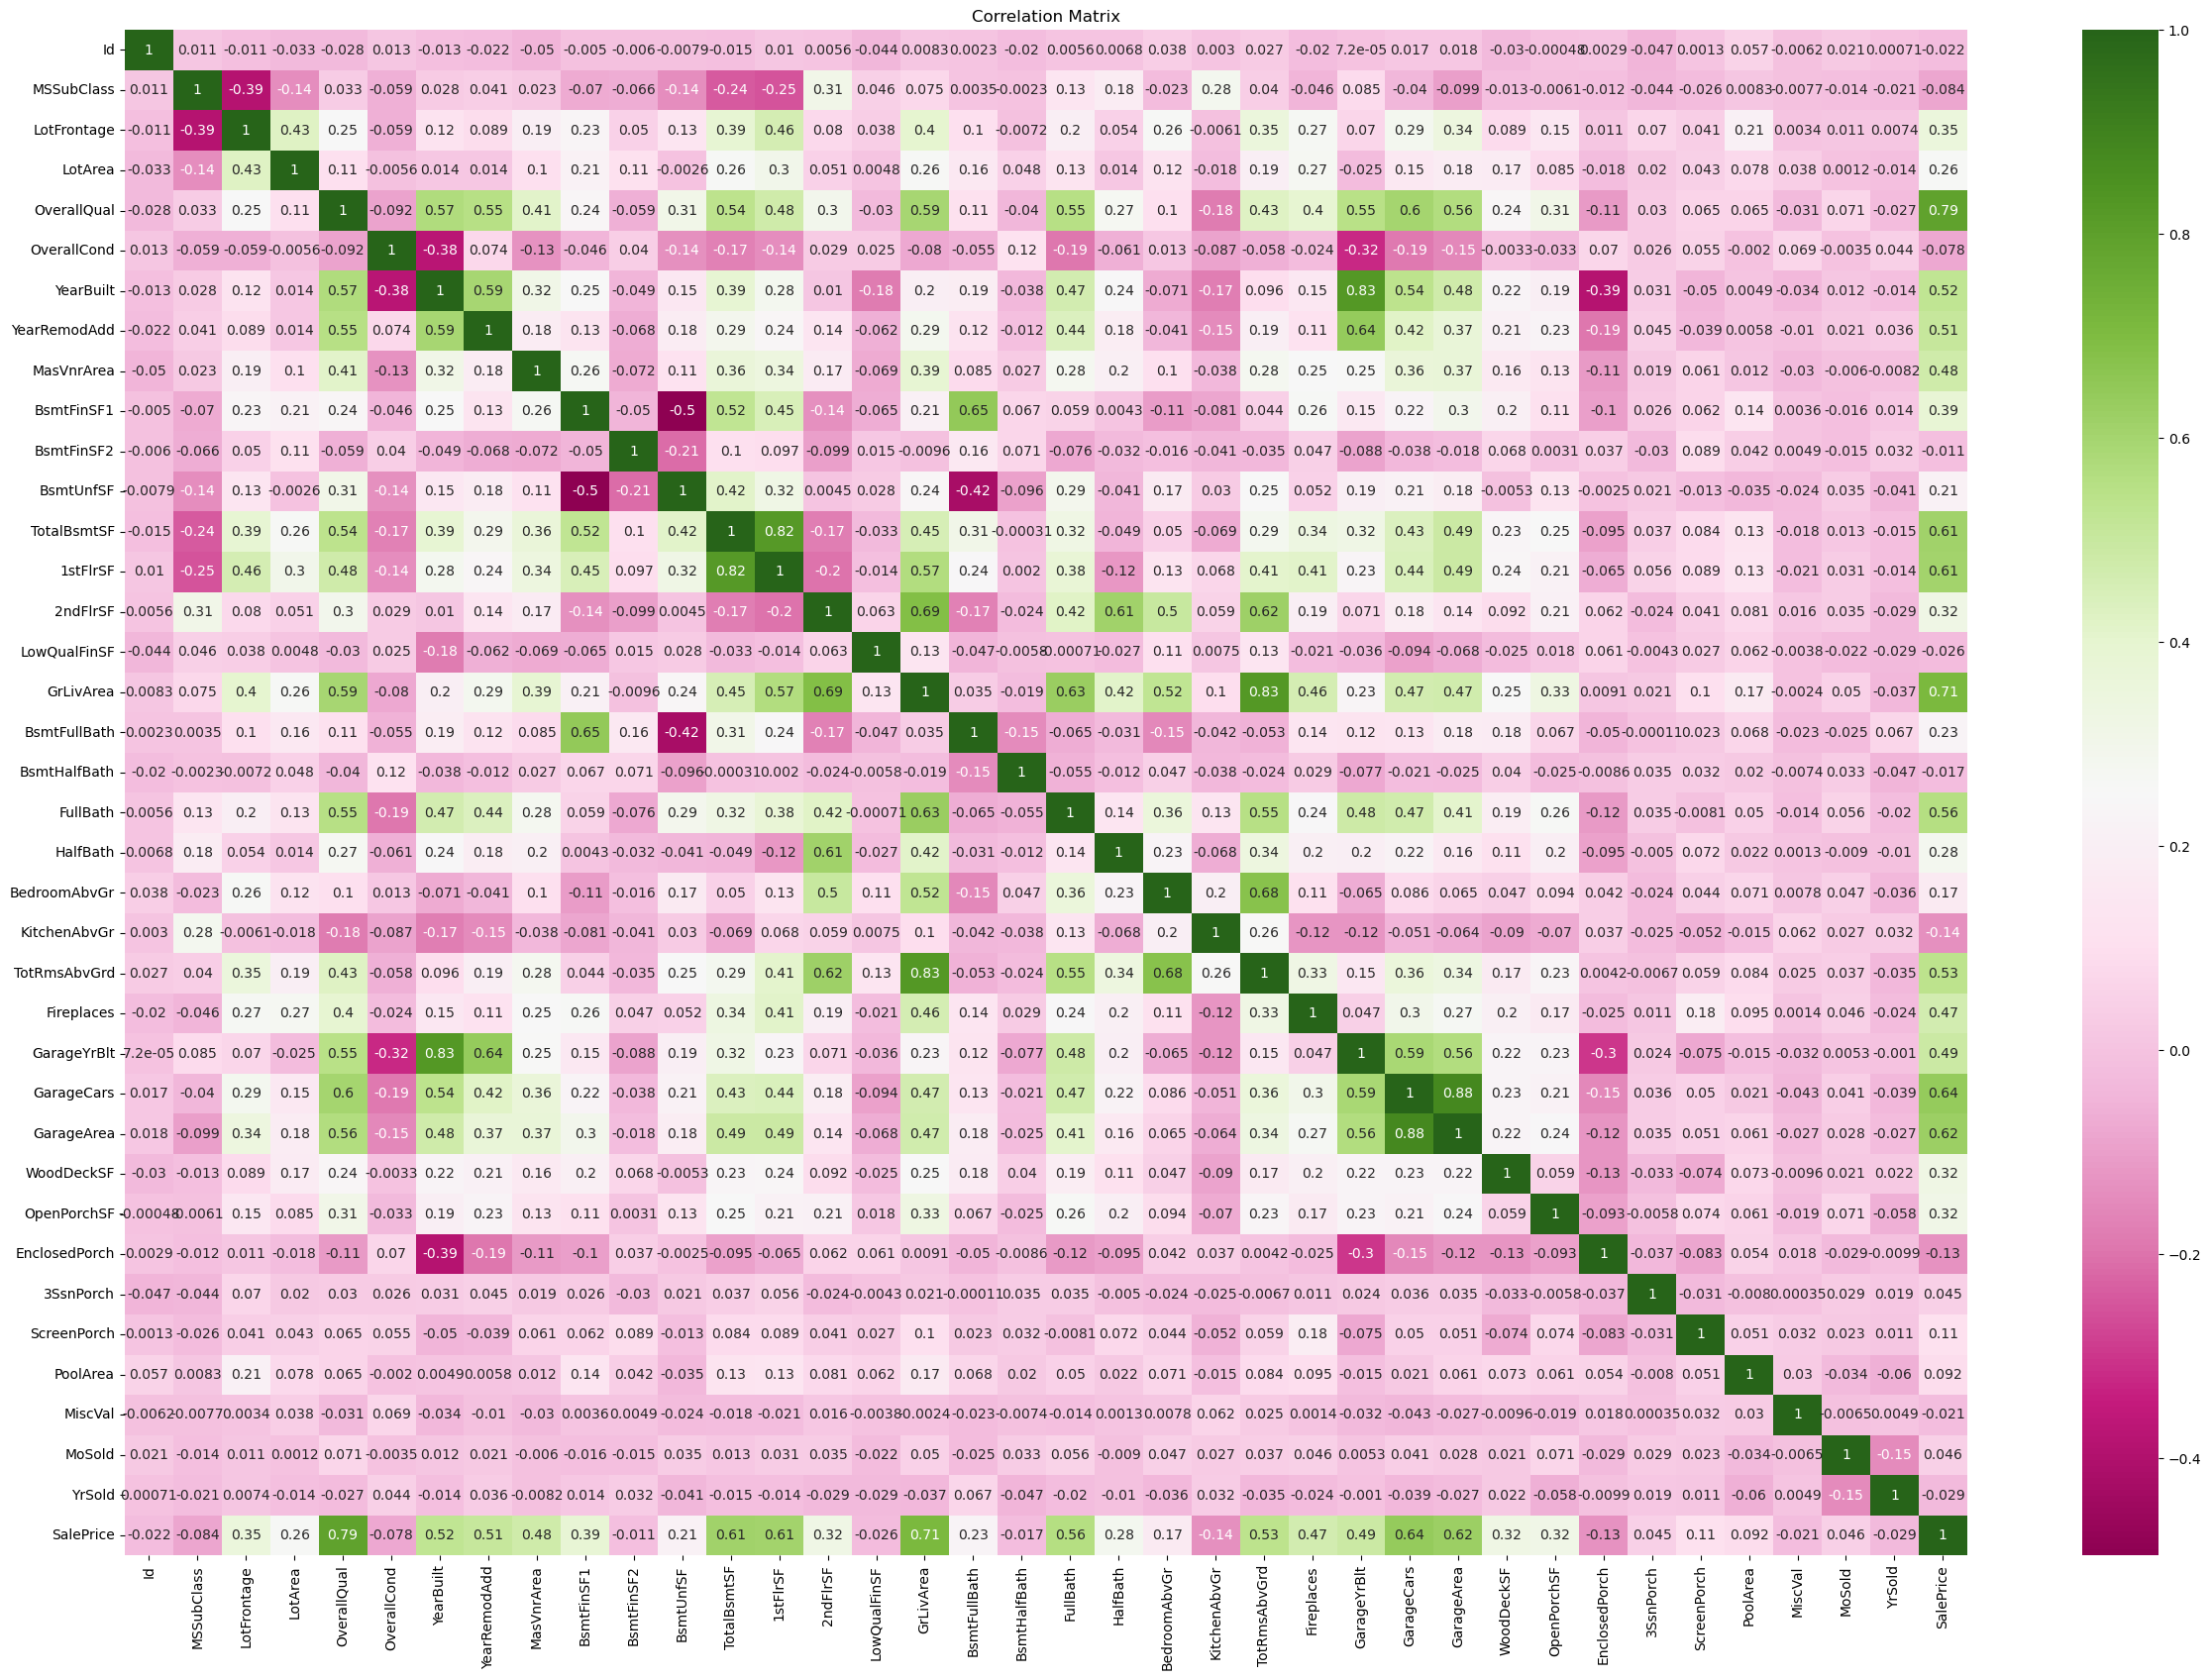

In [41]:
# create heatmap
correlation_matrix = df.corr(numeric_only=True)
# label and title
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='PiYG')
plt.title('Correlation Matrix')
# show plot
plt.show()

### Correlation Heatmap:

#### ***OverallQual: which looks at the Overall material and finish quality and its correlation with other columns***

YearBuilt: 0.57

YearRemodAdd: 0.55

TotalBsmtSF: 0.54

GrLivArea: 0.59

FullBath: 0.55

GarageYrBlt: 0.55

GarageCars: 0.6

GarageArea: 0.56

SalePrice - 0.79


#### ***YearBuilt: Original construction date and its correlation with other columns***

YearRemodAdd: 0.59

GarageYrBlt: 0.83

GarageCars: 0.54

SalePrice - 0.52


#### ***YearRemodAdd: Remodel date and its correlation with other columns***

GarageYrBlt: 0.64

SalePrice - 0.51


#### ***TotalBsmtSF: Total square feet of basement area and its correlation with other columns***

1stFlrSF: 0.82

SalePrice - 0.61


#### ***1stFlrSF: First Floor square feet and its correlation with other columns***

GrLivArea: 0.57

SalePrice - 0.61


#### ***2ndFlrSF: Second floor square feet and its correlation with other columns***

GrLivArea: 0.69

HalfBath: 0.61

Bedroom: 0.5

TotRmsAbvGrd: 0.62


#### ***GrLivArea: Above grade (ground) living area square feet and its correlation with other columns***

FullBath: 0.63

Bedroom: 0.5

TotRmsAbvGrd: 0.83

SalePrice - 0.71


#### ***FullBath: Full bathrooms above grade and its correlation with other columns***

TotRmsAbvGrd: 0.55

SalePrice - 0.56


#### ***Bedroom: Number of bedrooms above basement level and its correlation with other columns***

TotRmsAbvGrd: 0.68


#### ***TotRmsAbvGrd: Total rooms above grade (does not include bathrooms) and its correlation with other columns***

SalePrice - 0.53


#### ***GarageYrBlt: Year garage was built and its correlation with other columns***

GarageCars: 0.59

GarageArea: 0.56


#### ***GarageCars: Size of garage in car capacity and its correlation with other columns***

GarageArea: 0.88

SalePrice - 0.64

In [42]:
df_numeric = df.select_dtypes(include='number')
print(df_numeric.columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [55]:
correlation_matrix = df_numeric.corr()
target_corr = correlation_matrix["SalePrice"]
high_corr = target_corr[target_corr >= 0.5].sort_values(ascending=False)
print(high_corr.index.tolist())

['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']


In [56]:
correlation_matrix = df_numeric.corr()
target_corr = correlation_matrix["SalePrice"]
low_corr = target_corr[target_corr < 0.5].sort_values(ascending=False)
print(low_corr.index.tolist())

['GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch', 'PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath', 'MiscVal', 'Id', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass', 'EnclosedPorch', 'KitchenAbvGr']


For the numerical columns the only ones I will keeping are the ones that seem to influence one another. From this section, it will end up being 11 columns;

['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']


This means I will be dropping the other remaining numerical columns that did not have a high enough correlation with any other topics, a total of 27;

['GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch', 'PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath', 'MiscVal', 'Id', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass', 'EnclosedPorch', 'KitchenAbvGr']

In [45]:
print(df.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


<Axes: title={'center': 'Heatmap of missing values'}>

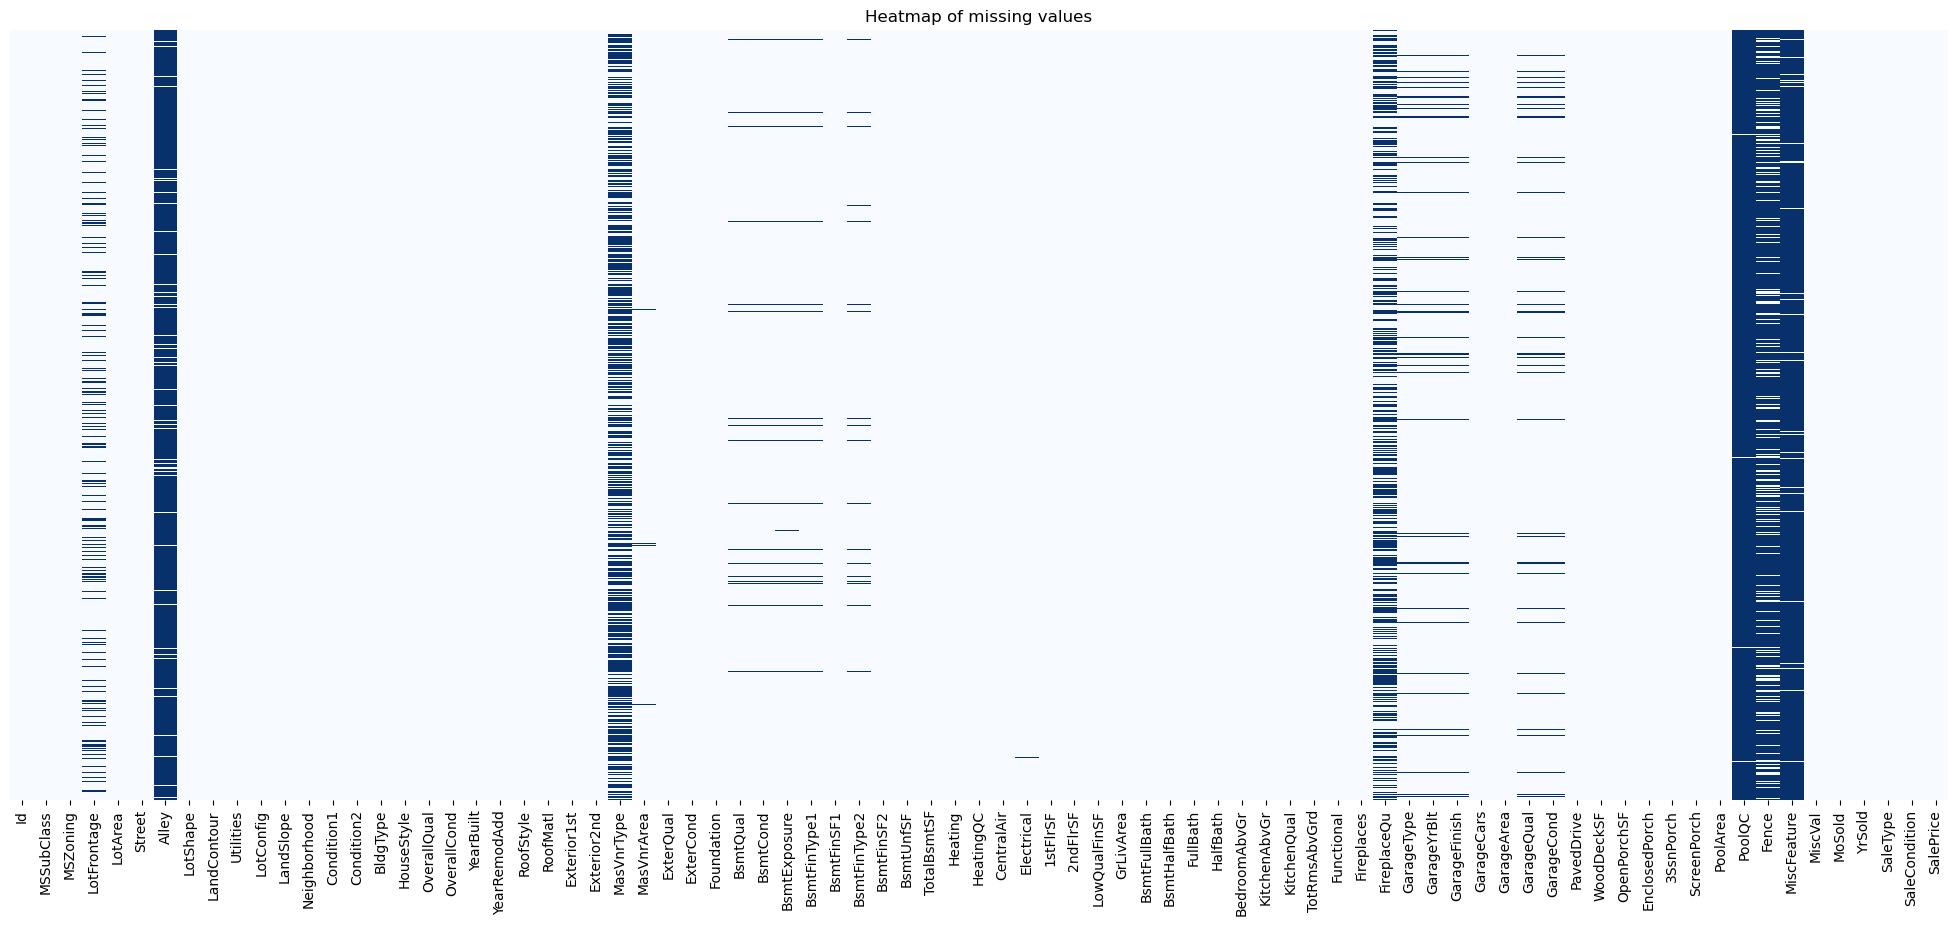

In [46]:
plt.figure(figsize=(25,10))
plt.title('Heatmap of missing values')
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Blues')

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

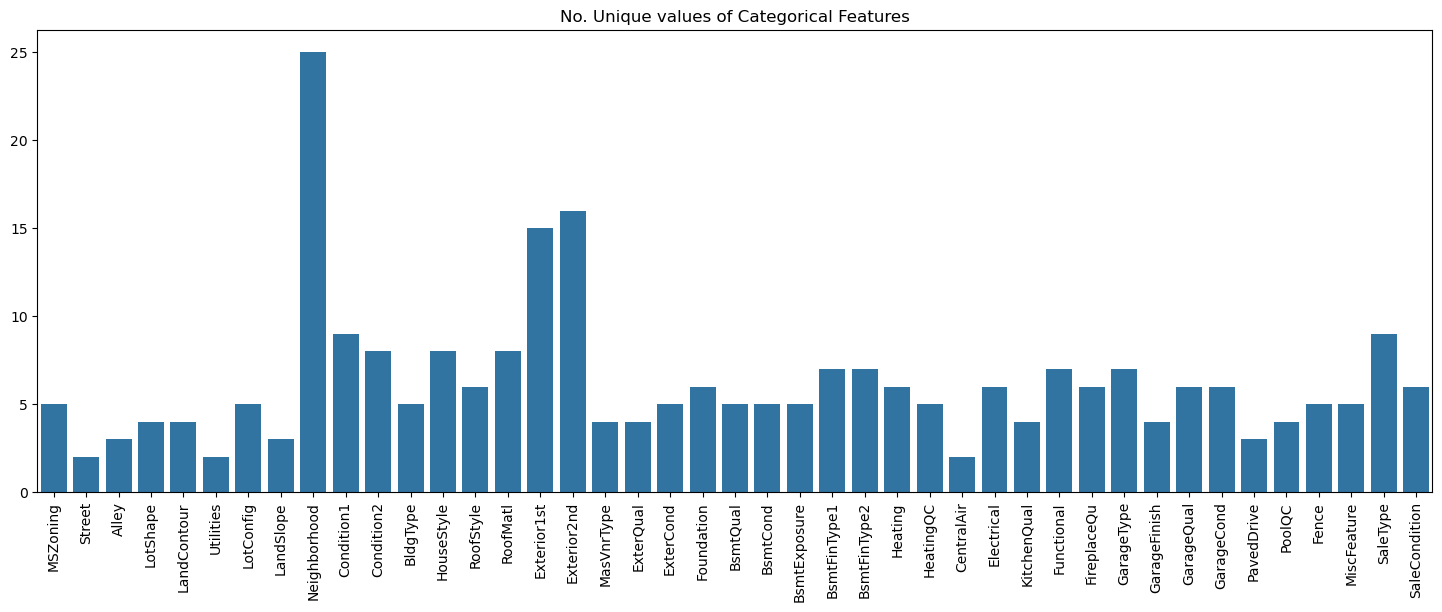

In [47]:
unique_values = []
for col in categorical_cols:
    unique_values.append(df[col].unique().size)
plt.figure(figsize=(18,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=categorical_cols,y=unique_values)

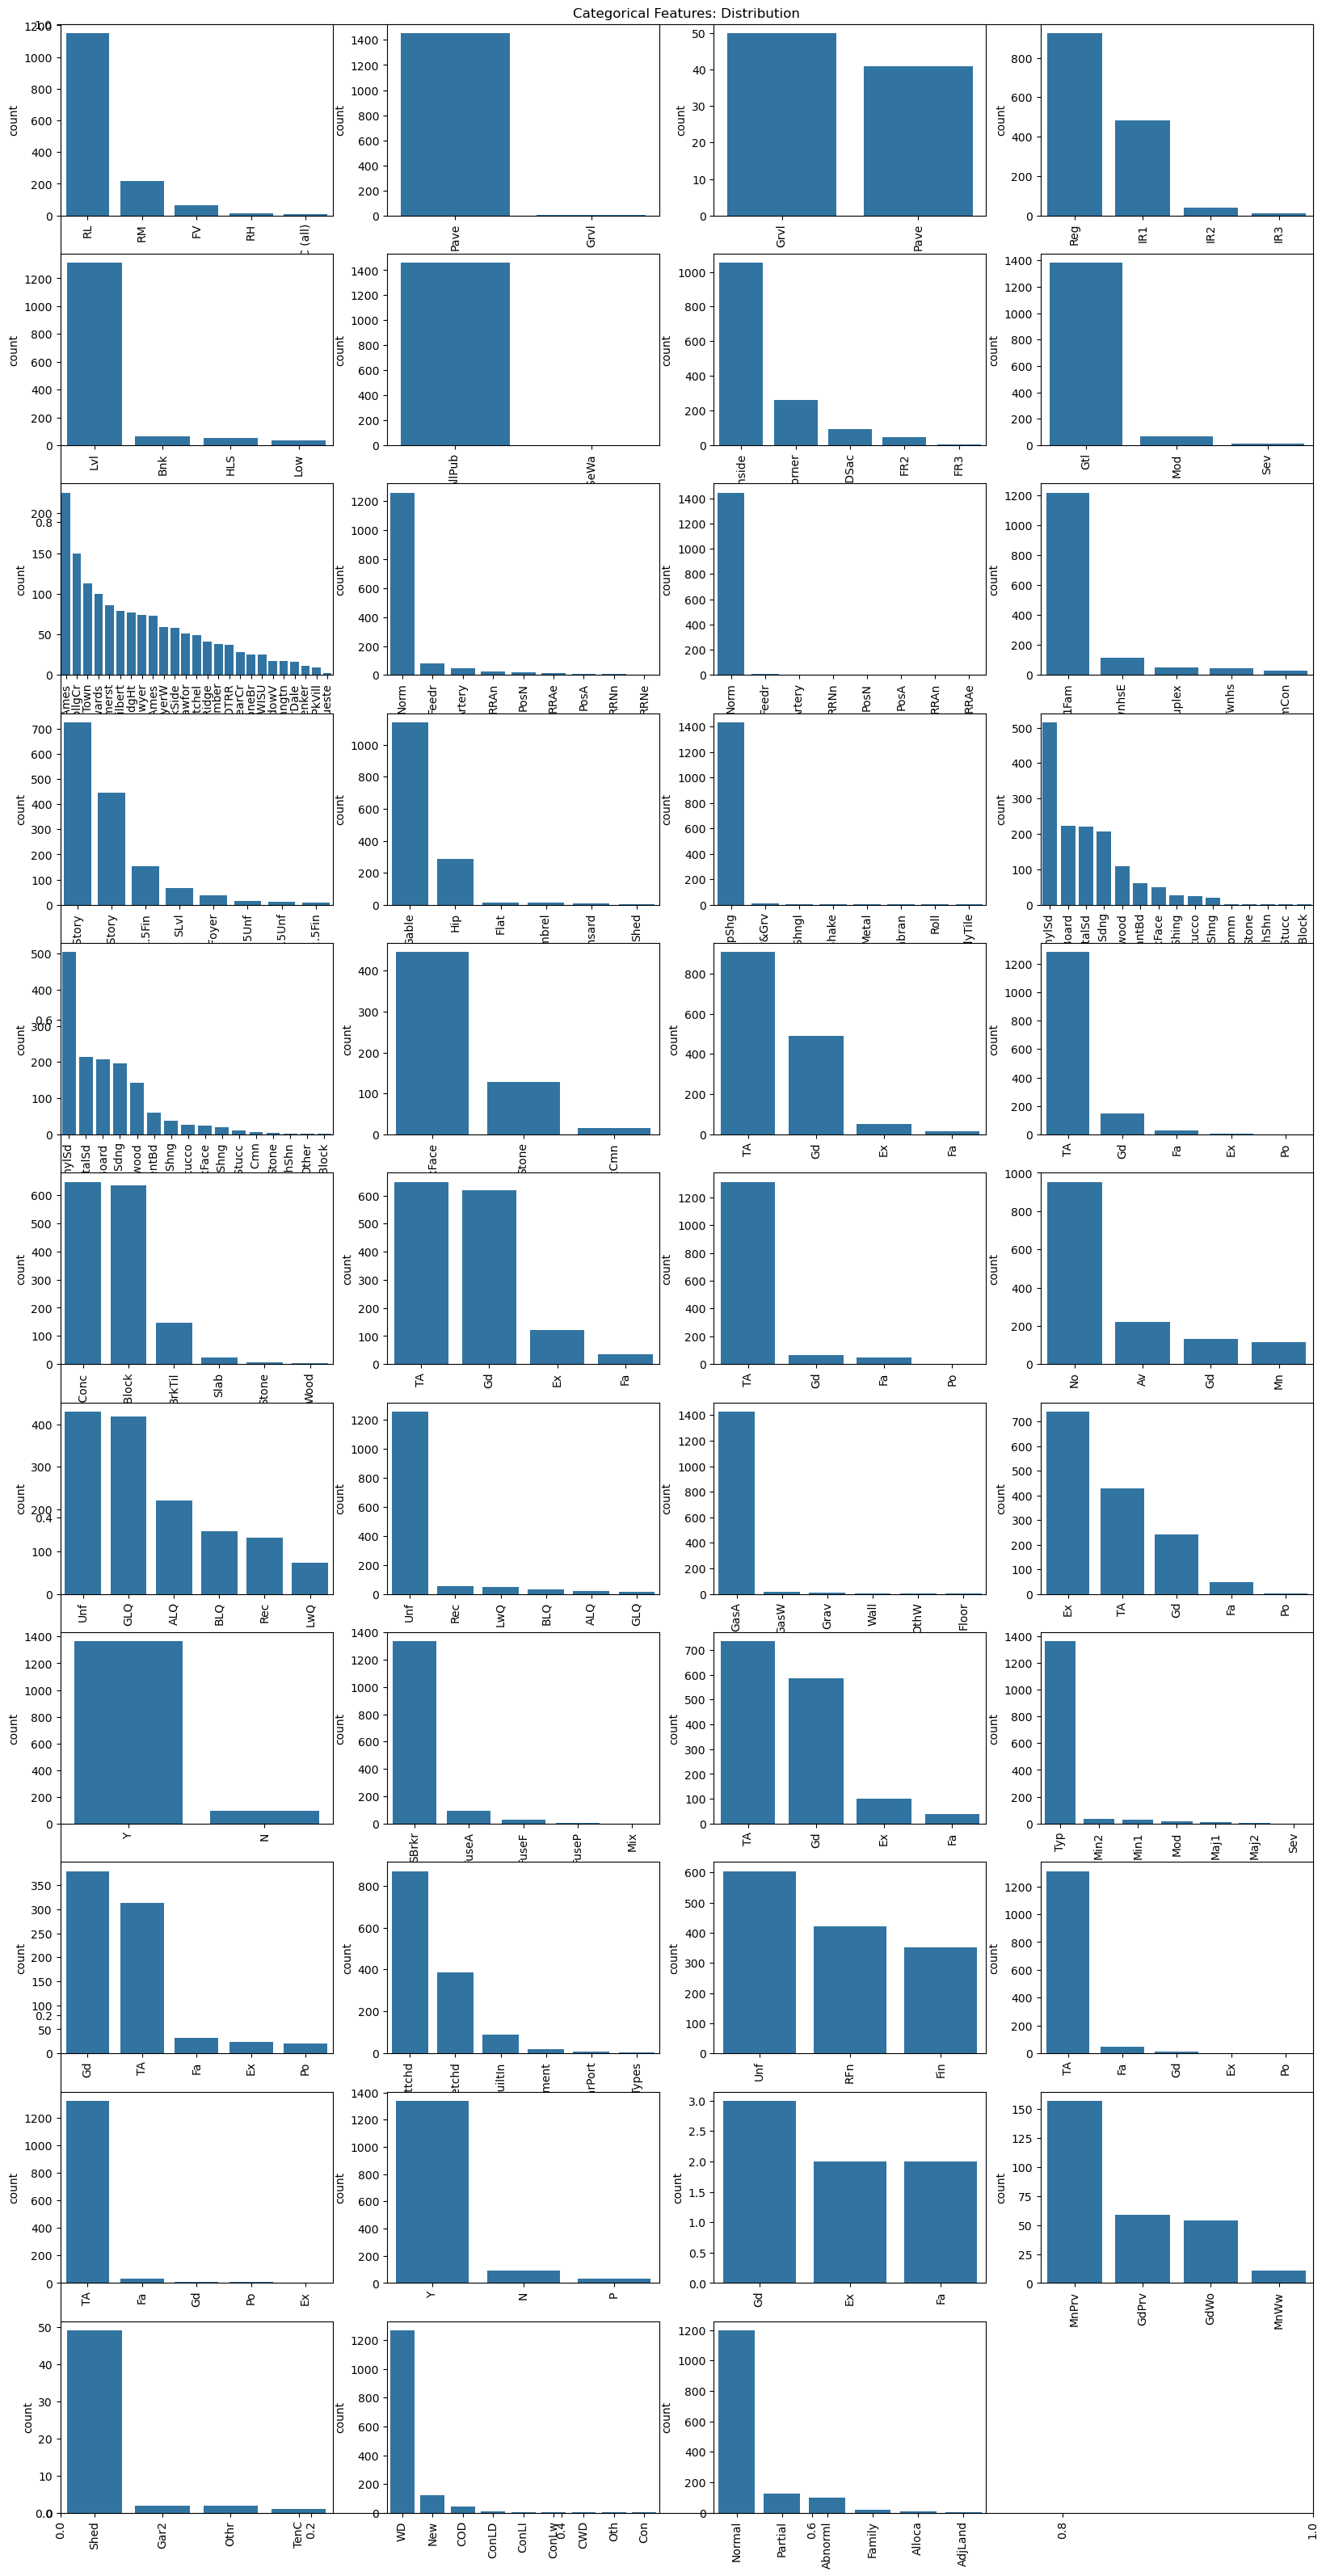

In [48]:
plt.figure(figsize=(20,40))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1
for col in categorical_cols:
  y = df[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index +=1

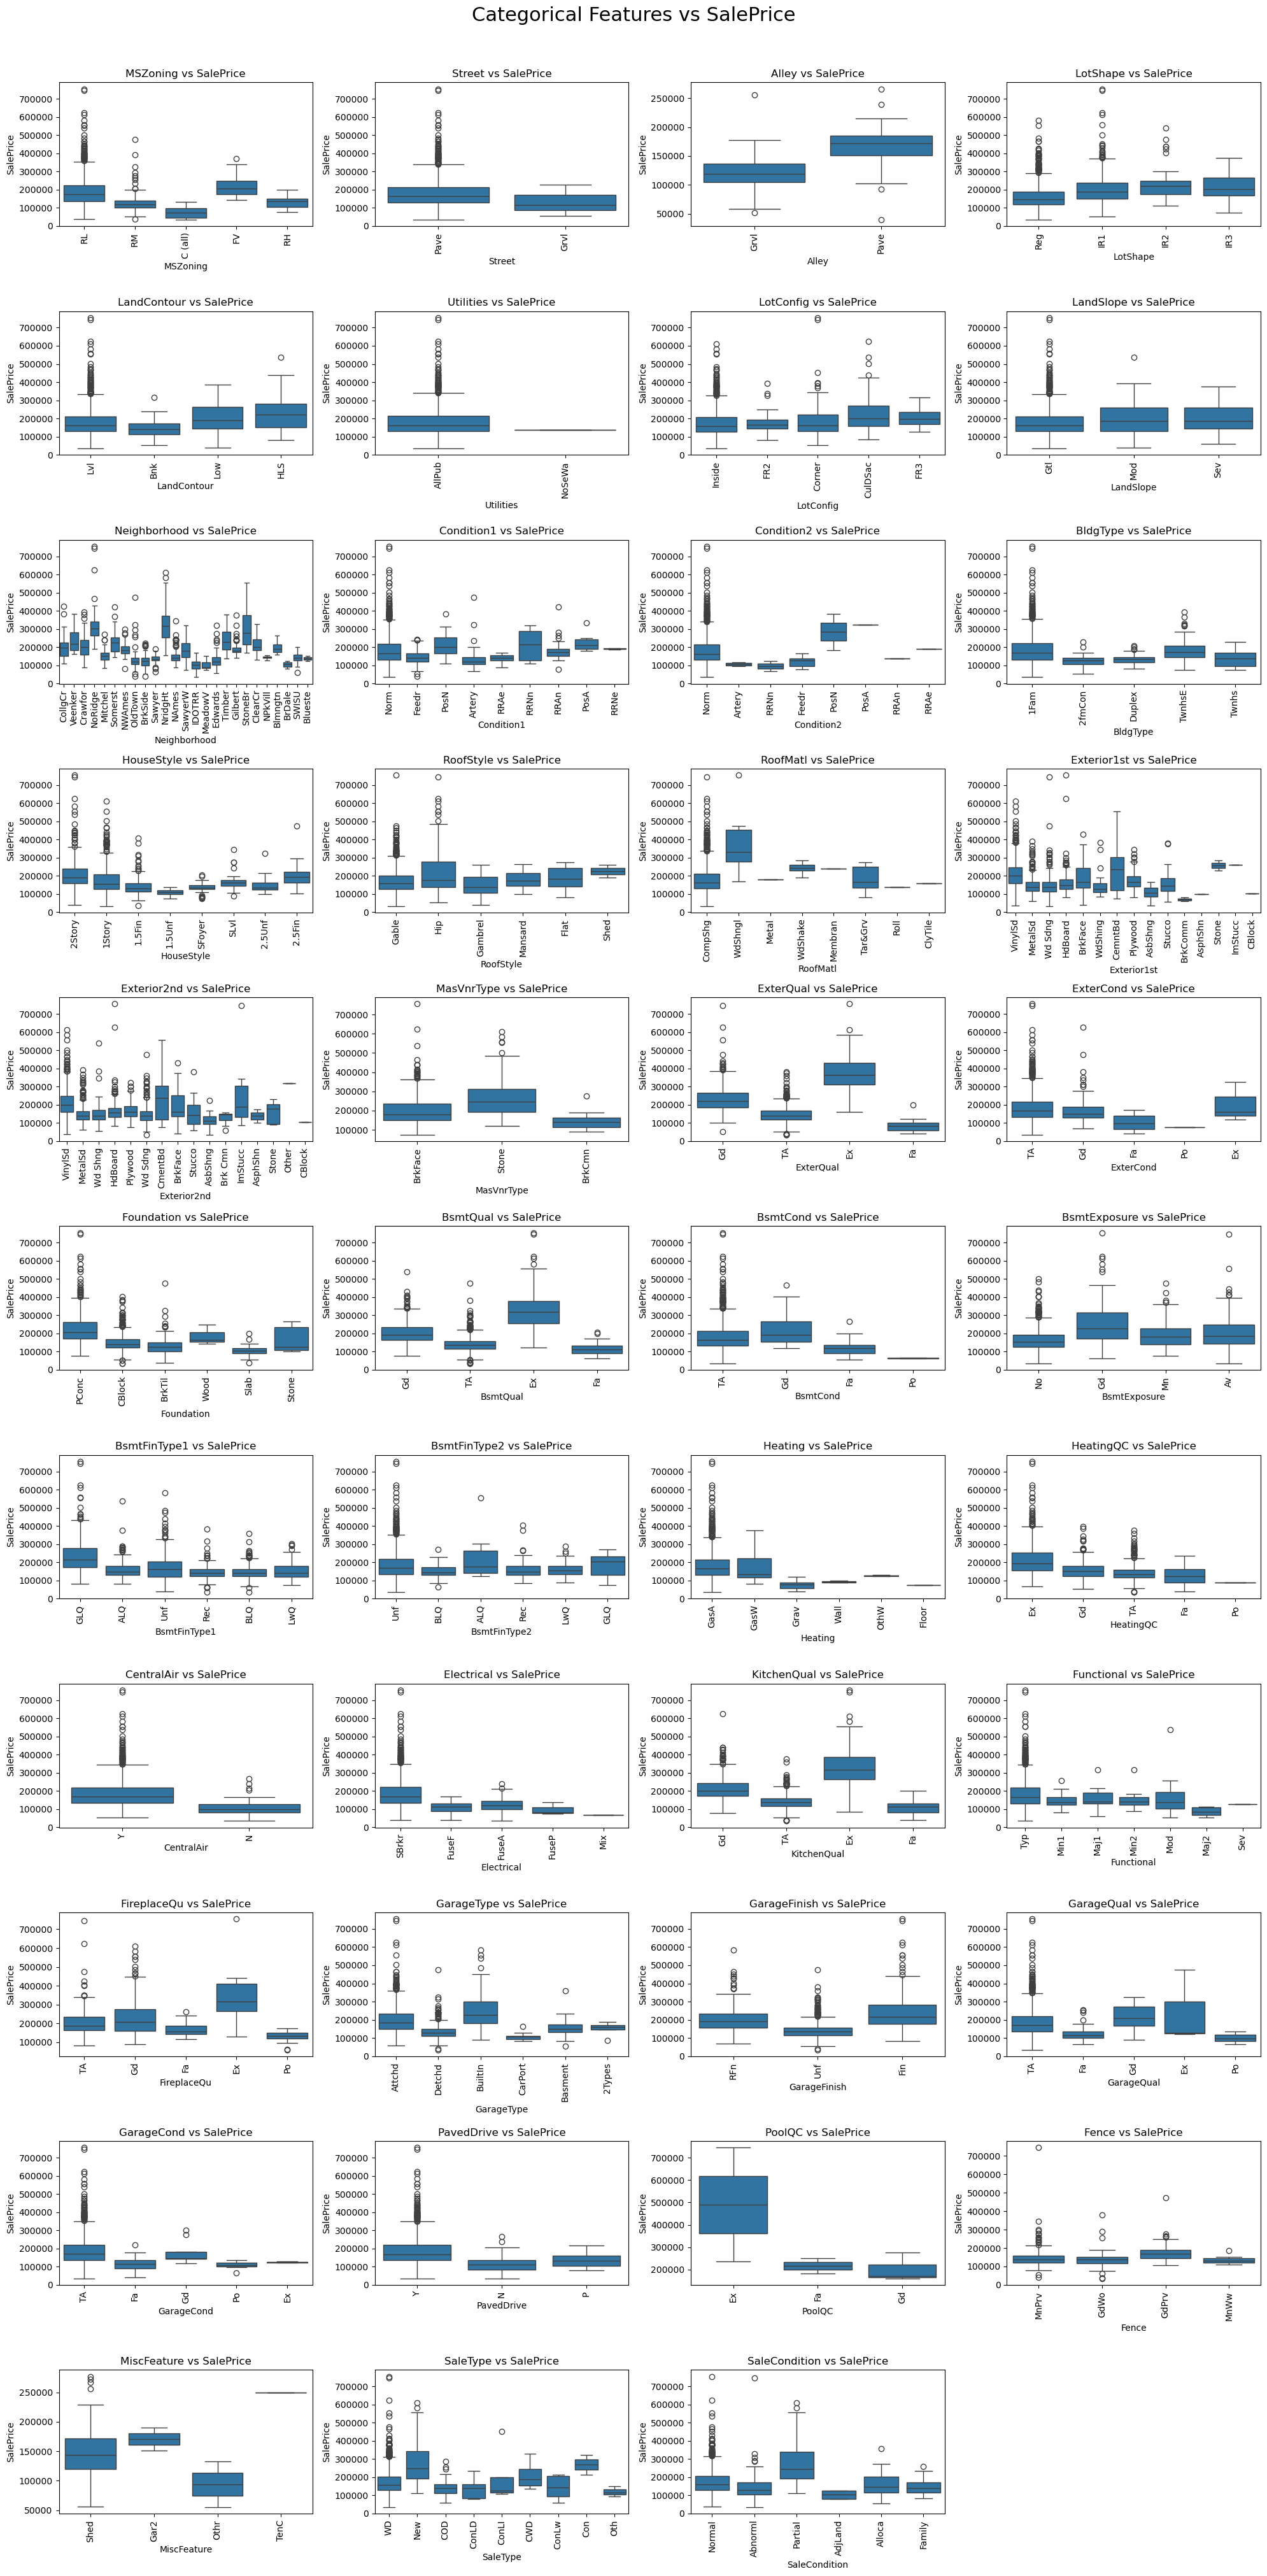

In [57]:
plt.figure(figsize=(20, 40))
plt.suptitle('Categorical Features vs SalePrice', fontsize=22, y=1.01)

index = 1
for col in categorical_cols:
    plt.subplot(11, 4, index)
    sns.boxplot(x=col, y='SalePrice', data=df)
    plt.xticks(rotation=90)
    plt.title(f'{col} vs SalePrice')
    index += 1

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Correlation of Categorical Features with SalePrice')

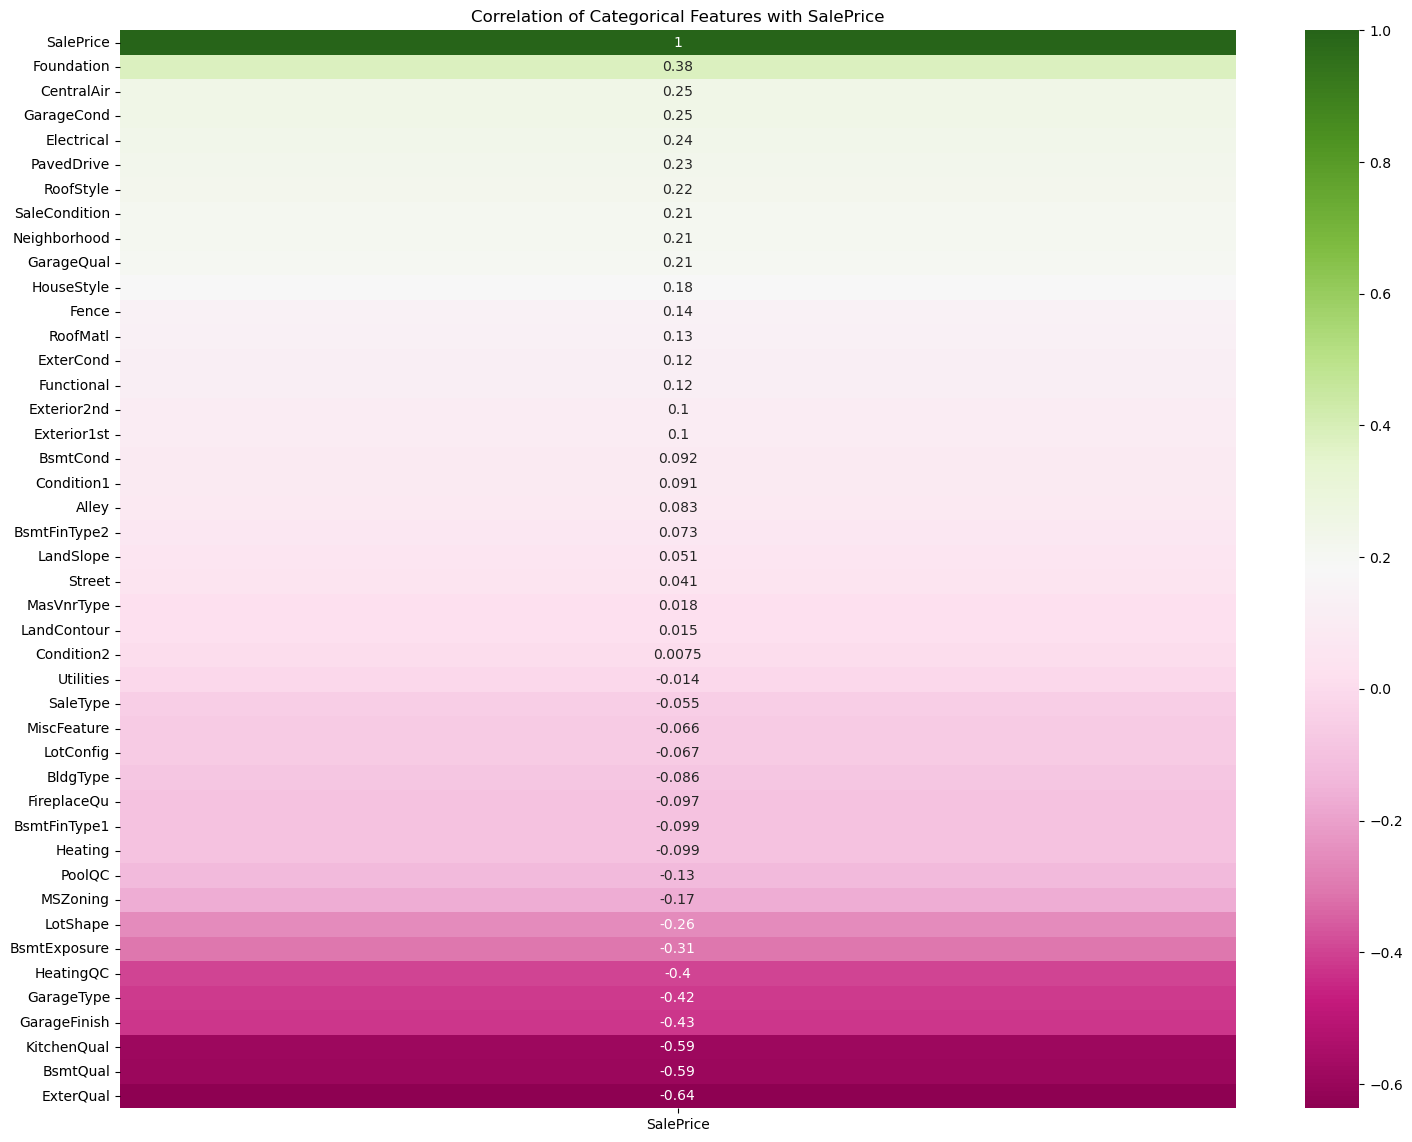

In [63]:
# 1. Add 'SalePrice' to the list of columns
cols = categorical_cols + ['SalePrice']
df_temp = df[cols].copy()

# 2. Fill missing values and label encode categoricals
le = LabelEncoder()
for col in categorical_cols:
    df_temp[col] = df_temp[col].fillna('None')
    df_temp[col] = le.fit_transform(df_temp[col])

# 3. Compute correlation
cm = df_temp.corr()

# 4. Plot heatmap of correlation with SalePrice
plt.figure(figsize=(18, 14))
sns.heatmap(cm[['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True, cmap='PiYG')
plt.title('Correlation of Categorical Features with SalePrice')

In [73]:
df_temp['SalePrice'] = df['SalePrice']

correlation_matrix = df_temp.corr()
target_corr = correlation_matrix['SalePrice']
high_corr = target_corr[target_corr >= 0.2].sort_values(ascending=False)

print(high_corr.index.tolist())

['SalePrice', 'Foundation', 'CentralAir', 'GarageCond', 'Electrical', 'PavedDrive', 'RoofStyle', 'SaleCondition', 'Neighborhood', 'GarageQual']


In [72]:
df_temp['SalePrice'] = df['SalePrice']
correlation_matrix = df_temp.corr()

target_corr = correlation_matrix['SalePrice']
low_corr = target_corr[target_corr < 0.2].sort_values(ascending=False)

# 6. Print the selected categorical features
print(low_corr.index.tolist())

['HouseStyle', 'Fence', 'RoofMatl', 'ExterCond', 'Functional', 'Exterior2nd', 'Exterior1st', 'BsmtCond', 'Condition1', 'Alley', 'BsmtFinType2', 'LandSlope', 'Street', 'MasVnrType', 'LandContour', 'Condition2', 'Utilities', 'SaleType', 'MiscFeature', 'LotConfig', 'BldgType', 'FireplaceQu', 'BsmtFinType1', 'Heating', 'PoolQC', 'MSZoning', 'LotShape', 'BsmtExposure', 'HeatingQC', 'GarageType', 'GarageFinish', 'KitchenQual', 'BsmtQual', 'ExterQual']


Keeping 10 columns;
['SalePrice', 'Foundation', 'CentralAir', 'GarageCond', 'Electrical', 'PavedDrive', 'RoofStyle', 'SaleCondition', 'Neighborhood', 'GarageQual']

Dropping the rest;
['HouseStyle', 'Fence', 'RoofMatl', 'ExterCond', 'Functional', 'Exterior2nd', 'Exterior1st', 'BsmtCond', 'Condition1', 'Alley', 'BsmtFinType2', 'LandSlope', 'Street', 'MasVnrType', 'LandContour', 'Condition2', 'Utilities', 'SaleType', 'MiscFeature', 'LotConfig', 'BldgType', 'FireplaceQu', 'BsmtFinType1', 'Heating', 'PoolQC', 'MSZoning', 'LotShape', 'BsmtExposure', 'HeatingQC', 'GarageType', 'GarageFinish', 'KitchenQual', 'BsmtQual', 'ExterQual']